#### Baseline Model

X_train shape: (5000, 28, 28, 1)
Y_train shape: (5000, 10)
X_test shape: (1000, 28, 28, 1)
Train on 4000 samples, validate on 1000 samples
Epoch 1/30
4000/4000 [==============================] - 3s - loss: 2.4572 - acc: 0.1000 - val_loss: 2.4014 - val_acc: 0.0540
Epoch 2/30
4000/4000 [==============================] - 3s - loss: 2.3314 - acc: 0.1095 - val_loss: 2.3349 - val_acc: 0.1210
Epoch 3/30
4000/4000 [==============================] - 3s - loss: 2.3167 - acc: 0.1135 - val_loss: 2.3069 - val_acc: 0.0540
Epoch 4/30
4000/4000 [==============================] - 3s - loss: 2.3013 - acc: 0.1295 - val_loss: 2.2748 - val_acc: 0.0550
Epoch 5/30
4000/4000 [==============================] - 3s - loss: 2.2065 - acc: 0.1992 - val_loss: 1.9663 - val_acc: 0.3450
Epoch 6/30
4000/4000 [==============================] - 3s - loss: 1.9725 - acc: 0.3112 - val_loss: 1.5227 - val_acc: 0.5940
Epoch 7/30
4000/4000 [==============================] - 3s - loss: 1.7328 - acc: 0.3932 - val_loss: 1.2614 - va

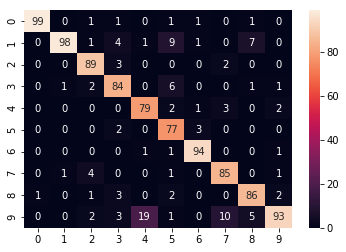

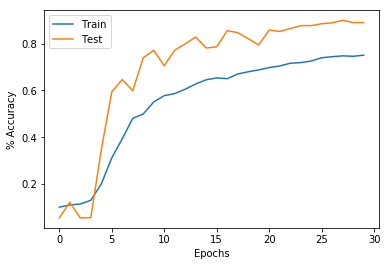

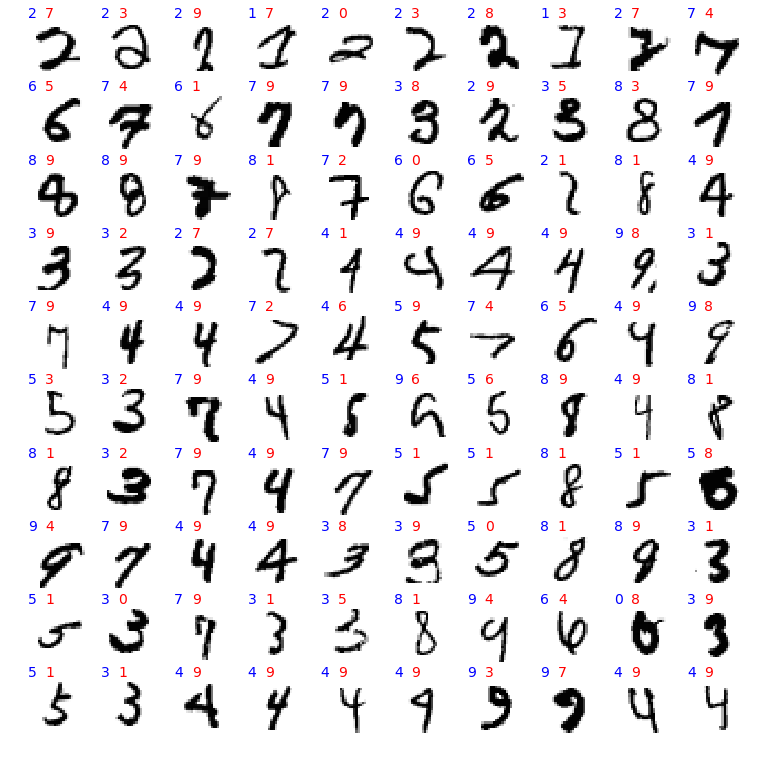

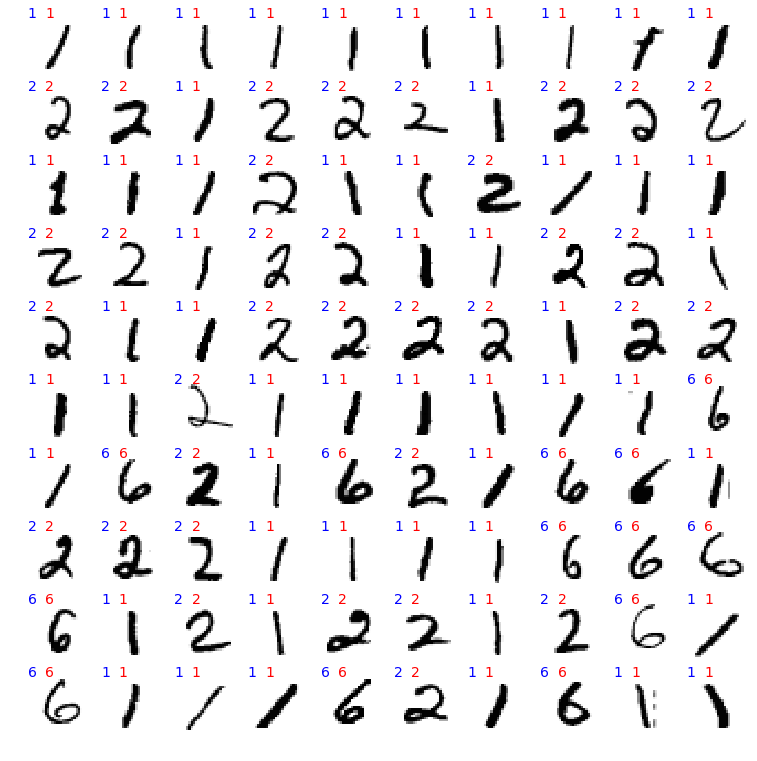

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_4 (ZeroPaddin (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_3 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
activation_5 (Activation)    (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_4 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
activation_6 (Activation)    (None, 5, 5, 16)          0         
__________

In [11]:
# -*- coding: utf-8 -*-
"""
HW4 CNN
"""

# Import Packages
import pandas as pd
import numpy as np
np.random.seed(1337) 
import matplotlib.pyplot as plt

from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop


import seaborn as sn

# Read Data
train = pd.read_csv("C://Users//User//Desktop//SYSC 575//HW4//small_train.csv",header = None).values
test  = pd.read_csv("C://Users//User//Desktop//SYSC 575//HW4//small_test.csv",header = None).values


# Baseline Model
img_rows, img_cols = 28, 28

batch_size = 100 
nb_classes = 10
nb_epoch = 30


# Check Keras backend
if(K.image_dim_ordering()=="th"): # for Theano
    X_train = train[:, 1:].reshape(train.shape[0], 1, img_rows, img_cols)
    X_test = test[:, 1:].reshape(test.shape[0], 1, img_rows, img_cols)
    in_shape = (1, img_rows, img_cols)
else:  # for TensorFlow
    X_train = train[:, 1:].reshape(train.shape[0], img_rows, img_cols, 1)
    X_test = test[:, 1:].reshape(test.shape[0], img_rows, img_cols, 1)
    in_shape = (img_rows, img_cols, 1)

# First data is label (already removed from X_train)
y_train = train[:, 0] 
y_test = test[:,0]
# Make the value floats in [0;1] instead of int in [0;255]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


# convert class vectors to binary class matrices (ie one-hot vectors)
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# Display the shapes to check if everything's ok
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)

model = Sequential()

# Add padding to take 28x28 to 32x32
model.add(ZeroPadding2D((2,2),input_shape=in_shape))

# Roughly equivalent to C1
model.add(Convolution2D(6, (5, 5), activation = 'relu',  kernel_initializer='he_normal'))

# Roughly equivalent to S2
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Activation("sigmoid"))

#model.add(Convolution2D(6, (2, 2), strides = (2,2),  activation = 'sigmoid', kernel_initializer='he_normal'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

# Roughly equivalent to C3
model.add(Convolution2D(16, (5, 5), activation = 'relu', kernel_initializer='he_normal'))

# Roughly equivalent to S4
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Activation("sigmoid"))

model.add(Dropout(0.2))

#model.add(Convolution2D(16, (2, 2), strides = (2,2),  activation = 'sigmoid', kernel_initializer='he_normal'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

# Roughly equivalent to C5
model.add(Convolution2D(120, (3, 3), activation = 'relu', kernel_initializer='he_normal'))
model.add(Flatten())

# Roughly equivalent to F6
model.add(Dense(84, activation = 'tanh', kernel_initializer='he_normal'))


# Output Layer
model.add(Dense(nb_classes, activation = 'softmax', kernel_initializer='he_normal')) #Last layer with one output per class

# Use RMSprop for training weights
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=["accuracy"])

# Alternative training approach using stochastic gradient descent (very very slow)
# sgd = SGD(lr=0.4,momentum=0.1)
# model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=["accuracy"])

# Let's Learn!!
fit = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_split=.2)

# Use the test data to see how we do
yPred = model.predict_classes(X_test)

# Confusion Matrix
targets = test[:,0]

cm = np.array([[0] * 10] * 10)
for i in range(len(targets)):
 cm[yPred[i],targets[i]] += 1
print(np.sum(np.diag(cm))/1000)

# Confusion Matrix HeatMap
df = pd.DataFrame([yPred, targets])
sn.heatmap(cm, annot = True)
plt.show()

# Accuracy Plots 
plt.plot(fit.history['acc'])
plt.plot(fit.history['val_acc'])
plt.legend(['Train','Test'])
plt.xlabel('Epochs')
plt.ylabel('% Accuracy')
plt.show()

#  Lets look at the ones we got WRONG in thte test set

test_wrong = [im for im in zip(X_test,yPred,test[:,0]) if im[1] != im[2]]

plt.figure(figsize=(10, 10))
for ind, val in enumerate(test_wrong[:100]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((28,28))
    plt.axis("off")
    plt.text(0, 0, val[2], fontsize=14, color='blue')
    plt.text(8, 0, val[1], fontsize=14, color='red')
    plt.imshow(im, cmap='gray')

plt.show()

#  Lets look at some of the ones we got RIGHT in thte test set

test_wrong = [im for im in zip(X_test,yPred,test[:,0]) if im[1] == im[2]]

plt.figure(figsize=(10, 10))
for ind, val in enumerate(test_wrong[:100]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((28,28))
    plt.axis("off")
    plt.text(0, 0, val[2], fontsize=14, color='blue')
    plt.text(8, 0, val[1], fontsize=14, color='red')
    plt.imshow(im, cmap='gray')

plt.show()
model.summary()

#### MaxPooling 

X_train shape: (5000, 28, 28, 1)
Y_train shape: (5000, 10)
X_test shape: (1000, 28, 28, 1)
Train on 4000 samples, validate on 1000 samples
Epoch 1/30
4000/4000 [==============================] - 4s - loss: 2.4349 - acc: 0.1065 - val_loss: 2.3461 - val_acc: 0.1110
Epoch 2/30
4000/4000 [==============================] - 3s - loss: 2.3260 - acc: 0.1142 - val_loss: 2.3091 - val_acc: 0.1000
Epoch 3/30
4000/4000 [==============================] - 3s - loss: 2.3143 - acc: 0.1105 - val_loss: 2.3097 - val_acc: 0.0700
Epoch 4/30
4000/4000 [==============================] - 3s - loss: 2.3010 - acc: 0.1215 - val_loss: 2.2710 - val_acc: 0.0870
Epoch 5/30
4000/4000 [==============================] - 3s - loss: 2.1852 - acc: 0.2010 - val_loss: 1.8869 - val_acc: 0.4220
Epoch 6/30
4000/4000 [==============================] - 3s - loss: 1.9509 - acc: 0.3085 - val_loss: 1.5334 - val_acc: 0.5440
Epoch 7/30
4000/4000 [==============================] - 3s - loss: 1.7171 - acc: 0.4105 - val_loss: 1.2667 - va

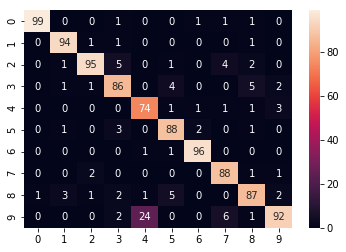

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


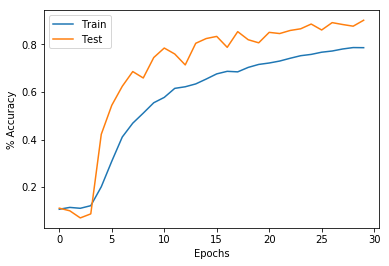

In [4]:
# Baseline Model
img_rows, img_cols = 28, 28

batch_size = 100 
nb_classes = 10 
nb_epoch = 30


# Check Keras backend
if(K.image_dim_ordering()=="th"): # for Theano
    X_train = train[:, 1:].reshape(train.shape[0], 1, img_rows, img_cols)
    X_test = test[:, 1:].reshape(test.shape[0], 1, img_rows, img_cols)
    in_shape = (1, img_rows, img_cols)
else:  # for TensorFlow
    X_train = train[:, 1:].reshape(train.shape[0], img_rows, img_cols, 1)
    X_test = test[:, 1:].reshape(test.shape[0], img_rows, img_cols, 1)
    in_shape = (img_rows, img_cols, 1)

# First data is label (already removed from X_train)
y_train = train[:, 0] 
y_test = test[:,0]
# Make the value floats in [0;1] instead of int in [0;255]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


# convert class vectors to binary class matrices (ie one-hot vectors)
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# Display the shapes to check if everything's ok
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)

model = Sequential()

# Add padding to take 28x28 to 32x32
model.add(ZeroPadding2D((2,2),input_shape=in_shape))

# Roughly equivalent to C1
model.add(Convolution2D(6, (5, 5), activation = 'relu',  kernel_initializer='he_normal'))

# Roughly equivalent to S2
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation("sigmoid"))

#model.add(Convolution2D(6, (2, 2), strides = (2,2),  activation = 'sigmoid', kernel_initializer='he_normal'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

# Roughly equivalent to C3
model.add(Convolution2D(16, (5, 5), activation = 'relu', kernel_initializer='he_normal'))

# Roughly equivalent to S4
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation("sigmoid"))

model.add(Dropout(0.2))

#model.add(Convolution2D(16, (2, 2), strides = (2,2),  activation = 'sigmoid', kernel_initializer='he_normal'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

# Roughly equivalent to C5
model.add(Convolution2D(120, (3, 3), activation = 'relu', kernel_initializer='he_normal'))
model.add(Flatten())

# Roughly equivalent to F6
model.add(Dense(84, activation = 'tanh', kernel_initializer='he_normal'))


# Output Layer
model.add(Dense(nb_classes, activation = 'softmax', kernel_initializer='he_normal')) #Last layer with one output per class

# Use RMSprop for training weights
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=["accuracy"])

# Alternative training approach using stochastic gradient descent (very very slow)
# sgd = SGD(lr=0.4,momentum=0.1)
# model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=["accuracy"])

# Let's Learn!!
fit = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_split=.2)

# Use the test data to see how we do
yPred = model.predict_classes(X_test)

# Confusion Matrix
targets = test[:,0]

cm = np.array([[0] * 10] * 10)
for i in range(len(targets)):
 cm[yPred[i],targets[i]] += 1
print(np.sum(np.diag(cm))/1000)

# Confusion Matrix HeatMap
sn.heatmap(cm, annot = True)
plt.show()

# Accuracy Plots 
plt.plot(fit.history['acc'])
plt.plot(fit.history['val_acc'])
plt.legend(['Train','Test'])
plt.xlabel('Epochs')
plt.ylabel('% Accuracy')
plt.show()

#  Lets look at the ones we got WRONG in thte test set

test_wrong = [im for im in zip(X_test,yPred,test[:,0]) if im[1] != im[2]]

plt.figure(figsize=(10, 10))
for ind, val in enumerate(test_wrong[:100]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((28,28))
    plt.axis("off")
    plt.text(0, 0, val[2], fontsize=14, color='blue')
    plt.text(8, 0, val[1], fontsize=14, color='red')
    plt.imshow(im, cmap='gray')

plt.show()

#  Lets look at some of the ones we got RIGHT in thte test set

test_wrong = [im for im in zip(X_test,yPred,test[:,0]) if im[1] == im[2]]

plt.figure(figsize=(10, 10))
for ind, val in enumerate(test_wrong[:100]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((28,28))
    plt.axis("off")
    plt.text(0, 0, val[2], fontsize=14, color='blue')
    plt.text(8, 0, val[1], fontsize=14, color='red')
    plt.imshow(im, cmap='gray')

plt.show()
model.summary()

#### Maxpooling, sigmoid activation

X_train shape: (5000, 28, 28, 1)
Y_train shape: (5000, 10)
X_test shape: (1000, 28, 28, 1)
Train on 4000 samples, validate on 1000 samples
Epoch 1/30
4000/4000 [==============================] - 4s - loss: 2.4876 - acc: 0.1000 - val_loss: 2.3436 - val_acc: 0.0910
Epoch 2/30
4000/4000 [==============================] - 3s - loss: 2.3116 - acc: 0.0998 - val_loss: 2.3203 - val_acc: 0.1210
Epoch 3/30
4000/4000 [==============================] - 3s - loss: 2.3090 - acc: 0.1032 - val_loss: 2.3159 - val_acc: 0.1110
Epoch 4/30
4000/4000 [==============================] - 3s - loss: 2.3073 - acc: 0.1045 - val_loss: 2.3110 - val_acc: 0.1000
Epoch 5/30
4000/4000 [==============================] - 3s - loss: 2.3073 - acc: 0.1050 - val_loss: 2.3308 - val_acc: 0.0700
Epoch 6/30
4000/4000 [==============================] - 3s - loss: 2.3099 - acc: 0.0995 - val_loss: 2.3387 - val_acc: 0.0540
Epoch 7/30
4000/4000 [==============================] - 3s - loss: 2.3096 - acc: 0.0980 - val_loss: 2.3247 - va

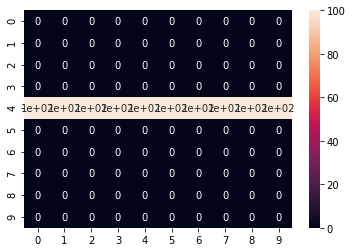

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


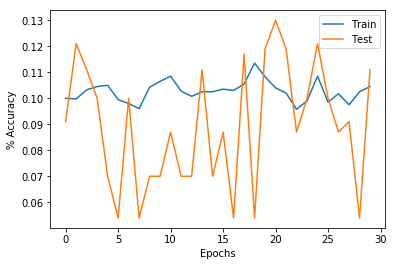

In [6]:
# -*- coding: utf-8 -*-
"""
HW4 CNN
"""

# Import Packages
import pandas as pd
import numpy as np
np.random.seed(1337) 
import matplotlib.pyplot as plt

from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop

import seaborn as sn
from keras.utils import vis_utils 


# Read Data
train = pd.read_csv("C://Users//User//Desktop//SYSC 575//HW4//small_train.csv",header = None).values
test  = pd.read_csv("C://Users//User//Desktop//SYSC 575//HW4//small_test.csv",header = None).values


# Baseline Model
img_rows, img_cols = 28, 28

batch_size = 100 
nb_classes = 10 
nb_epoch = 30


# Check Keras backend
if(K.image_dim_ordering()=="th"): # for Theano
    X_train = train[:, 1:].reshape(train.shape[0], 1, img_rows, img_cols)
    X_test = test[:, 1:].reshape(test.shape[0], 1, img_rows, img_cols)
    in_shape = (1, img_rows, img_cols)
else:  # for TensorFlow
    X_train = train[:, 1:].reshape(train.shape[0], img_rows, img_cols, 1)
    X_test = test[:, 1:].reshape(test.shape[0], img_rows, img_cols, 1)
    in_shape = (img_rows, img_cols, 1)

# First data is label (already removed from X_train)
y_train = train[:, 0] 
y_test = test[:,0]
# Make the value floats in [0;1] instead of int in [0;255]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


# convert class vectors to binary class matrices (ie one-hot vectors)
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# Display the shapes to check if everything's ok
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)

model = Sequential()

# Add padding to take 28x28 to 32x32
model.add(ZeroPadding2D((2,2),input_shape=in_shape))

# Roughly equivalent to C1
model.add(Convolution2D(6, (5, 5), activation = 'sigmoid',  kernel_initializer='he_normal'))

# Roughly equivalent to S2
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation("sigmoid"))

#model.add(Convolution2D(6, (2, 2), strides = (2,2),  activation = 'sigmoid', kernel_initializer='he_normal'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

# Roughly equivalent to C3
model.add(Convolution2D(16, (5, 5), activation = 'sigmoid', kernel_initializer='he_normal'))

# Roughly equivalent to S4
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation("sigmoid"))

model.add(Dropout(0.2))

#model.add(Convolution2D(16, (2, 2), strides = (2,2),  activation = 'sigmoid', kernel_initializer='he_normal'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

# Roughly equivalent to C5
model.add(Convolution2D(120, (3, 3), activation = 'sigmoid', kernel_initializer='he_normal'))
model.add(Flatten())

# Roughly equivalent to F6
model.add(Dense(84, activation = 'tanh', kernel_initializer='he_normal'))


# Output Layer
model.add(Dense(nb_classes, activation = 'softmax', kernel_initializer='he_normal')) #Last layer with one output per class

# Use RMSprop for training weights
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=["accuracy"])

# Alternative training approach using stochastic gradient descent (very very slow)
# sgd = SGD(lr=0.4,momentum=0.1)
# model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=["accuracy"])

# Let's Learn!!
fit = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_split=.2)

# Use the test data to see how we do
yPred = model.predict_classes(X_test)

# Confusion Matrix
targets = test[:,0]

cm = np.array([[0] * 10] * 10)
for i in range(len(targets)):
 cm[yPred[i],targets[i]] += 1
print(np.sum(np.diag(cm))/1000)

# Confusion Matrix HeatMap
df = pd.DataFrame([yPred, targets])
sn.heatmap(cm, annot = True)
plt.show()

# Accuracy Plots 
plt.plot(fit.history['acc'])
plt.plot(fit.history['val_acc'])
plt.legend(['Train','Test'])
plt.xlabel('Epochs')
plt.ylabel('% Accuracy')
plt.show()

#  Lets look at the ones we got WRONG in thte test set

test_wrong = [im for im in zip(X_test,yPred,test[:,0]) if im[1] != im[2]]

plt.figure(figsize=(10, 10))
for ind, val in enumerate(test_wrong[:100]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((28,28))
    plt.axis("off")
    plt.text(0, 0, val[2], fontsize=14, color='blue')
    plt.text(8, 0, val[1], fontsize=14, color='red')
    plt.imshow(im, cmap='gray')

plt.show()

#  Lets look at some of the ones we got RIGHT in thte test set

test_wrong = [im for im in zip(X_test,yPred,test[:,0]) if im[1] == im[2]]

plt.figure(figsize=(10, 10))
for ind, val in enumerate(test_wrong[:100]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((28,28))
    plt.axis("off")
    plt.text(0, 0, val[2], fontsize=14, color='blue')
    plt.text(8, 0, val[1], fontsize=14, color='red')
    plt.imshow(im, cmap='gray')

plt.show()
model.summary()

#### MaxPooling, Tanh activation on Conv Layers

X_train shape: (5000, 28, 28, 1)
Y_train shape: (5000, 10)
X_test shape: (1000, 28, 28, 1)
Train on 4000 samples, validate on 1000 samples
Epoch 1/30
4000/4000 [==============================] - 2s - loss: 2.4533 - acc: 0.1042 - val_loss: 2.3797 - val_acc: 0.0540
Epoch 2/30
4000/4000 [==============================] - 2s - loss: 2.3066 - acc: 0.1247 - val_loss: 2.2888 - val_acc: 0.1420
Epoch 3/30
4000/4000 [==============================] - 2s - loss: 1.9615 - acc: 0.3225 - val_loss: 1.3335 - val_acc: 0.6370
Epoch 4/30
4000/4000 [==============================] - 2s - loss: 1.3619 - acc: 0.5402 - val_loss: 0.7782 - val_acc: 0.8130
Epoch 5/30
4000/4000 [==============================] - 2s - loss: 1.0523 - acc: 0.6470 - val_loss: 0.6020 - val_acc: 0.8360
Epoch 6/30
4000/4000 [==============================] - 2s - loss: 0.8696 - acc: 0.7163 - val_loss: 0.5155 - val_acc: 0.8710
Epoch 7/30
4000/4000 [==============================] - 2s - loss: 0.7290 - acc: 0.7612 - val_loss: 0.4830 - va

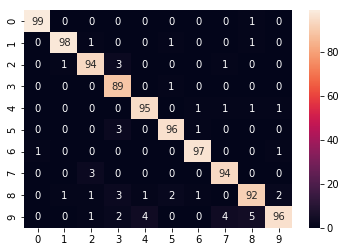

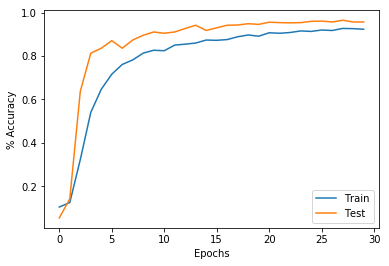

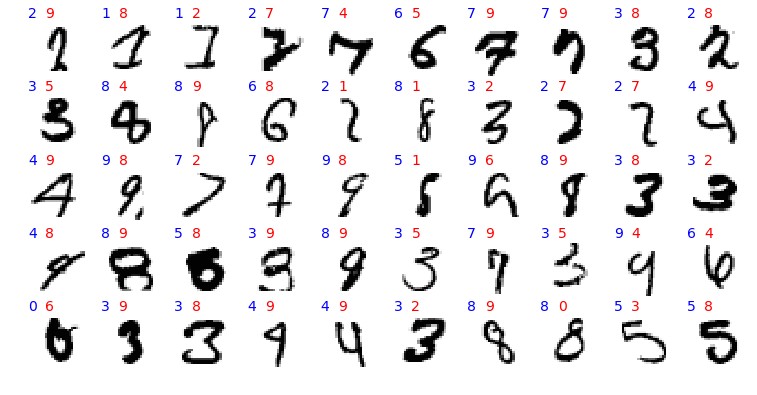

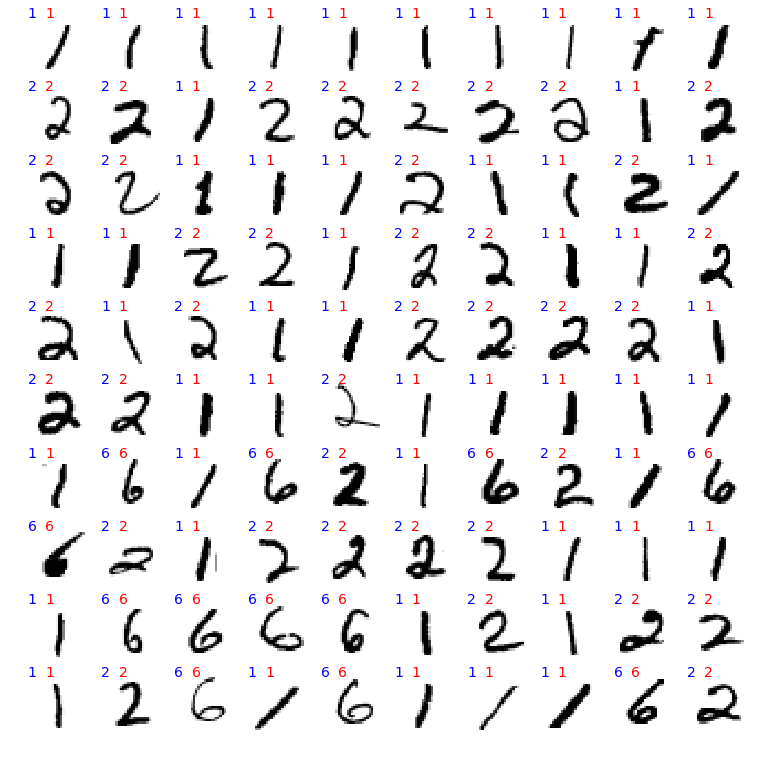

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_2 (ZeroPaddin (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
activation_3 (Activation)    (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
activation_4 (Activation)    (None, 5, 5, 16)          0         
__________

In [9]:
# -*- coding: utf-8 -*-
"""
HW4 CNN
"""

# Import Packages
import pandas as pd
import numpy as np
np.random.seed(1337) 
import matplotlib.pyplot as plt

from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop

import seaborn as sn
from keras.utils import vis_utils 


# Read Data
train = pd.read_csv("C://Users//User//Desktop//SYSC 575//HW4//small_train.csv",header = None).values
test  = pd.read_csv("C://Users//User//Desktop//SYSC 575//HW4//small_test.csv",header = None).values


# Baseline Model
img_rows, img_cols = 28, 28

batch_size = 100 
nb_classes = 10 
nb_epoch = 30


# Check Keras backend
if(K.image_dim_ordering()=="th"): # for Theano
    X_train = train[:, 1:].reshape(train.shape[0], 1, img_rows, img_cols)
    X_test = test[:, 1:].reshape(test.shape[0], 1, img_rows, img_cols)
    in_shape = (1, img_rows, img_cols)
else:  # for TensorFlow
    X_train = train[:, 1:].reshape(train.shape[0], img_rows, img_cols, 1)
    X_test = test[:, 1:].reshape(test.shape[0], img_rows, img_cols, 1)
    in_shape = (img_rows, img_cols, 1)

# First data is label (already removed from X_train)
y_train = train[:, 0] 
y_test = test[:,0]
# Make the value floats in [0;1] instead of int in [0;255]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


# convert class vectors to binary class matrices (ie one-hot vectors)
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# Display the shapes to check if everything's ok
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)

model = Sequential()

# Add padding to take 28x28 to 32x32
model.add(ZeroPadding2D((2,2),input_shape=in_shape))

# Roughly equivalent to C1
model.add(Convolution2D(6, (5, 5), activation = 'tanh',  kernel_initializer='he_normal'))

# Roughly equivalent to S2
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation("sigmoid"))

#model.add(Convolution2D(6, (2, 2), strides = (2,2),  activation = 'sigmoid', kernel_initializer='he_normal'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

# Roughly equivalent to C3
model.add(Convolution2D(16, (5, 5), activation = 'tanh', kernel_initializer='he_normal'))

# Roughly equivalent to S4
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation("sigmoid"))

model.add(Dropout(0.2))

#model.add(Convolution2D(16, (2, 2), strides = (2,2),  activation = 'sigmoid', kernel_initializer='he_normal'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

# Roughly equivalent to C5
model.add(Convolution2D(120, (3, 3), activation = 'tanh', kernel_initializer='he_normal'))
model.add(Flatten())

# Roughly equivalent to F6
model.add(Dense(84, activation = 'tanh', kernel_initializer='he_normal'))


# Output Layer
model.add(Dense(nb_classes, activation = 'softmax', kernel_initializer='he_normal')) #Last layer with one output per class

# Use RMSprop for training weights
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=["accuracy"])

# Alternative training approach using stochastic gradient descent (very very slow)
# sgd = SGD(lr=0.4,momentum=0.1)
# model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=["accuracy"])

# Let's Learn!!
fit = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_split=.2)

# Use the test data to see how we do
yPred = model.predict_classes(X_test)

# Confusion Matrix
targets = test[:,0]

cm = np.array([[0] * 10] * 10)
for i in range(len(targets)):
 cm[yPred[i],targets[i]] += 1
print(np.sum(np.diag(cm))/1000)

# Confusion Matrix HeatMap
sn.heatmap(cm, annot = True)
plt.show()

# Accuracy Plots 
plt.plot(fit.history['acc'])
plt.plot(fit.history['val_acc'])
plt.legend(['Train','Test'])
plt.xlabel('Epochs')
plt.ylabel('% Accuracy')
plt.show()

#  Lets look at the ones we got WRONG in thte test set

test_wrong = [im for im in zip(X_test,yPred,test[:,0]) if im[1] != im[2]]

plt.figure(figsize=(10, 10))
for ind, val in enumerate(test_wrong[:100]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((28,28))
    plt.axis("off")
    plt.text(0, 0, val[2], fontsize=14, color='blue')
    plt.text(8, 0, val[1], fontsize=14, color='red')
    plt.imshow(im, cmap='gray')

plt.show()

#  Lets look at some of the ones we got RIGHT in thte test set

test_wrong = [im for im in zip(X_test,yPred,test[:,0]) if im[1] == im[2]]

plt.figure(figsize=(10, 10))
for ind, val in enumerate(test_wrong[:100]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((28,28))
    plt.axis("off")
    plt.text(0, 0, val[2], fontsize=14, color='blue')
    plt.text(8, 0, val[1], fontsize=14, color='red')
    plt.imshow(im, cmap='gray')

plt.show()
model.summary()

### MaxPooling, tanh, Lr = .01

X_train shape: (5000, 28, 28, 1)
Y_train shape: (5000, 10)
X_test shape: (1000, 28, 28, 1)
Train on 4000 samples, validate on 1000 samples
Epoch 1/30
4000/4000 [==============================] - 3s - loss: 2.5706 - acc: 0.1020 - val_loss: 2.5486 - val_acc: 0.0540
Epoch 2/30
4000/4000 [==============================] - 3s - loss: 2.4203 - acc: 0.1015 - val_loss: 2.4235 - val_acc: 0.1210
Epoch 3/30
4000/4000 [==============================] - 3s - loss: 2.4292 - acc: 0.1030 - val_loss: 2.4446 - val_acc: 0.1210
Epoch 4/30
4000/4000 [==============================] - 3s - loss: 2.4706 - acc: 0.1057 - val_loss: 2.3690 - val_acc: 0.1190
Epoch 5/30
4000/4000 [==============================] - 3s - loss: 2.4073 - acc: 0.1043 - val_loss: 2.4318 - val_acc: 0.1110
Epoch 6/30
4000/4000 [==============================] - 3s - loss: 2.4302 - acc: 0.0962 - val_loss: 2.4147 - val_acc: 0.0870
Epoch 7/30
4000/4000 [==============================] - 3s - loss: 2.4328 - acc: 0.0940 - val_loss: 2.4236 - va

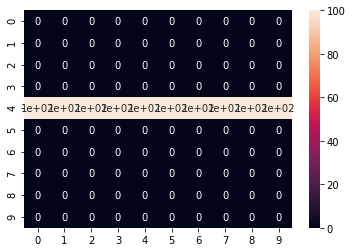

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


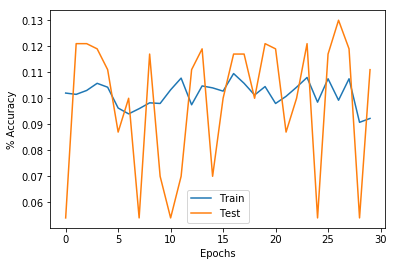

In [9]:
# -*- coding: utf-8 -*-
"""
HW4 CNN
"""

# Import Packages
import pandas as pd
import numpy as np
np.random.seed(1337) 
import matplotlib.pyplot as plt

from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop

import seaborn as sn
from keras.utils import vis_utils 


# Read Data
train = pd.read_csv("C://Users//User//Desktop//SYSC 575//HW4//small_train.csv",header = None).values
test  = pd.read_csv("C://Users//User//Desktop//SYSC 575//HW4//small_test.csv",header = None).values


# Baseline Model
img_rows, img_cols = 28, 28

batch_size = 100 
nb_classes = 10 
nb_epoch = 30


# Check Keras backend
if(K.image_dim_ordering()=="th"): # for Theano
    X_train = train[:, 1:].reshape(train.shape[0], 1, img_rows, img_cols)
    X_test = test[:, 1:].reshape(test.shape[0], 1, img_rows, img_cols)
    in_shape = (1, img_rows, img_cols)
else:  # for TensorFlow
    X_train = train[:, 1:].reshape(train.shape[0], img_rows, img_cols, 1)
    X_test = test[:, 1:].reshape(test.shape[0], img_rows, img_cols, 1)
    in_shape = (img_rows, img_cols, 1)

# First data is label (already removed from X_train)
y_train = train[:, 0] 
y_test = test[:,0]
# Make the value floats in [0;1] instead of int in [0;255]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


# convert class vectors to binary class matrices (ie one-hot vectors)
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# Display the shapes to check if everything's ok
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)

model = Sequential()

# Add padding to take 28x28 to 32x32
model.add(ZeroPadding2D((2,2),input_shape=in_shape))

# Roughly equivalent to C1
model.add(Convolution2D(6, (5, 5), activation = 'tanh',  kernel_initializer='he_normal'))

# Roughly equivalent to S2
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation("sigmoid"))

#model.add(Convolution2D(6, (2, 2), strides = (2,2),  activation = 'sigmoid', kernel_initializer='he_normal'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

# Roughly equivalent to C3
model.add(Convolution2D(16, (5, 5), activation = 'tanh', kernel_initializer='he_normal'))

# Roughly equivalent to S4
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation("sigmoid"))

model.add(Dropout(0.2))

#model.add(Convolution2D(16, (2, 2), strides = (2,2),  activation = 'sigmoid', kernel_initializer='he_normal'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

# Roughly equivalent to C5
model.add(Convolution2D(120, (3, 3), activation = 'tanh', kernel_initializer='he_normal'))
model.add(Flatten())

# Roughly equivalent to F6
model.add(Dense(84, activation = 'tanh', kernel_initializer='he_normal'))


# Output Layer
model.add(Dense(nb_classes, activation = 'softmax', kernel_initializer='he_normal')) #Last layer with one output per class

# Use RMSprop for training weights
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=.01), metrics=["accuracy"])

# Alternative training approach using stochastic gradient descent (very very slow)
# sgd = SGD(lr=0.4,momentum=0.1)
# model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=["accuracy"])

# Let's Learn!!
fit = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_split=.2)

# Use the test data to see how we do
yPred = model.predict_classes(X_test)

# Confusion Matrix
targets = test[:,0]

cm = np.array([[0] * 10] * 10)
for i in range(len(targets)):
 cm[yPred[i],targets[i]] += 1
print(cm)
print(np.sum(np.diag(cm))/1000)

# Confusion Matrix HeatMap
df = pd.DataFrame([yPred, targets])
sn.heatmap(cm, annot = True)
plt.show()

# Accuracy Plots
print(fit.history.keys())  
plt.plot(fit.history['acc'])
plt.plot(fit.history['val_acc'])
plt.legend(['Train','Test'])
plt.xlabel('Epochs')
plt.ylabel('% Accuracy')
plt.show()

#  Lets look at the ones we got WRONG in thte test set

test_wrong = [im for im in zip(X_test,yPred,test[:,0]) if im[1] != im[2]]

plt.figure(figsize=(10, 10))
for ind, val in enumerate(test_wrong[:100]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((28,28))
    plt.axis("off")
    plt.text(0, 0, val[2], fontsize=14, color='blue')
    plt.text(8, 0, val[1], fontsize=14, color='red')
    plt.imshow(im, cmap='gray')

plt.show()

#  Lets look at some of the ones we got RIGHT in thte test set

test_wrong = [im for im in zip(X_test,yPred,test[:,0]) if im[1] == im[2]]

plt.figure(figsize=(10, 10))
for ind, val in enumerate(test_wrong[:100]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((28,28))
    plt.axis("off")
    plt.text(0, 0, val[2], fontsize=14, color='blue')
    plt.text(8, 0, val[1], fontsize=14, color='red')
    plt.imshow(im, cmap='gray')

plt.show()
model.summary()

### MaxPooling, Tanh, LR = .0005, Epochs = 50

X_train shape: (5000, 28, 28, 1)
Y_train shape: (5000, 10)
X_test shape: (1000, 28, 28, 1)
Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 4s - loss: 2.4024 - acc: 0.1015 - val_loss: 2.4162 - val_acc: 0.0540
Epoch 2/50
4000/4000 [==============================] - 3s - loss: 2.3195 - acc: 0.1242 - val_loss: 2.3035 - val_acc: 0.1210
Epoch 3/50
4000/4000 [==============================] - 3s - loss: 2.2658 - acc: 0.1538 - val_loss: 2.1773 - val_acc: 0.2370
Epoch 4/50
4000/4000 [==============================] - 3s - loss: 2.0629 - acc: 0.2740 - val_loss: 1.7510 - val_acc: 0.5500
Epoch 5/50
4000/4000 [==============================] - 3s - loss: 1.7346 - acc: 0.4263 - val_loss: 1.3026 - val_acc: 0.7120
Epoch 6/50
4000/4000 [==============================] - 3s - loss: 1.4339 - acc: 0.5258 - val_loss: 0.9756 - val_acc: 0.7920
Epoch 7/50
4000/4000 [==============================] - 3s - loss: 1.2006 - acc: 0.6027 - val_loss: 0.7854 - va

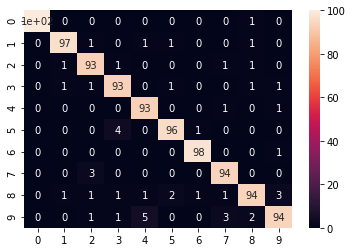

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


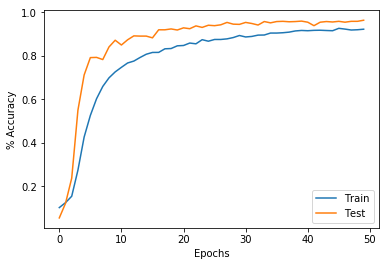

In [12]:
# -*- coding: utf-8 -*-
"""
HW4 CNN
"""

# Import Packages
import pandas as pd
import numpy as np
np.random.seed(1337) 
import matplotlib.pyplot as plt

from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop

import seaborn as sn
from keras.utils import vis_utils 


# Read Data
train = pd.read_csv("C://Users//User//Desktop//SYSC 575//HW4//small_train.csv",header = None).values
test  = pd.read_csv("C://Users//User//Desktop//SYSC 575//HW4//small_test.csv",header = None).values


# Baseline Model
img_rows, img_cols = 28, 28

batch_size = 100 
nb_classes = 10 
nb_epoch = 50


# Check Keras backend
if(K.image_dim_ordering()=="th"): # for Theano
    X_train = train[:, 1:].reshape(train.shape[0], 1, img_rows, img_cols)
    X_test = test[:, 1:].reshape(test.shape[0], 1, img_rows, img_cols)
    in_shape = (1, img_rows, img_cols)
else:  # for TensorFlow
    X_train = train[:, 1:].reshape(train.shape[0], img_rows, img_cols, 1)
    X_test = test[:, 1:].reshape(test.shape[0], img_rows, img_cols, 1)
    in_shape = (img_rows, img_cols, 1)

# First data is label (already removed from X_train)
y_train = train[:, 0] 
y_test = test[:,0]
# Make the value floats in [0;1] instead of int in [0;255]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


# convert class vectors to binary class matrices (ie one-hot vectors)
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# Display the shapes to check if everything's ok
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)

model = Sequential()

# Add padding to take 28x28 to 32x32
model.add(ZeroPadding2D((2,2),input_shape=in_shape))

# Roughly equivalent to C1
model.add(Convolution2D(6, (5, 5), activation = 'tanh',  kernel_initializer='he_normal'))

# Roughly equivalent to S2
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation("sigmoid"))

#model.add(Convolution2D(6, (2, 2), strides = (2,2),  activation = 'sigmoid', kernel_initializer='he_normal'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

# Roughly equivalent to C3
model.add(Convolution2D(16, (5, 5), activation = 'tanh', kernel_initializer='he_normal'))

# Roughly equivalent to S4
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation("sigmoid"))

model.add(Dropout(0.2))

#model.add(Convolution2D(16, (2, 2), strides = (2,2),  activation = 'sigmoid', kernel_initializer='he_normal'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

# Roughly equivalent to C5
model.add(Convolution2D(120, (3, 3), activation = 'tanh', kernel_initializer='he_normal'))
model.add(Flatten())

# Roughly equivalent to F6
model.add(Dense(84, activation = 'tanh', kernel_initializer='he_normal'))


# Output Layer
model.add(Dense(nb_classes, activation = 'softmax', kernel_initializer='he_normal')) #Last layer with one output per class

# Use RMSprop for training weights
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=.0005), metrics=["accuracy"])

# Alternative training approach using stochastic gradient descent (very very slow)
# sgd = SGD(lr=0.4,momentum=0.1)
# model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=["accuracy"])

# Let's Learn!!
fit = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_split=.2)

# Use the test data to see how we do
yPred = model.predict_classes(X_test)

# Confusion Matrix
targets = test[:,0]

cm = np.array([[0] * 10] * 10)
for i in range(len(targets)):
 cm[yPred[i],targets[i]] += 1
print(np.sum(np.diag(cm))/1000)

# Confusion Matrix HeatMap
df = pd.DataFrame([yPred, targets])
sn.heatmap(cm, annot = True)
plt.show()

# Accuracy Plots
print(fit.history.keys())  
plt.plot(fit.history['acc'])
plt.plot(fit.history['val_acc'])
plt.legend(['Train','Test'])
plt.xlabel('Epochs')
plt.ylabel('% Accuracy')
plt.show()

#  Lets look at the ones we got WRONG in thte test set

test_wrong = [im for im in zip(X_test,yPred,test[:,0]) if im[1] != im[2]]

plt.figure(figsize=(10, 10))
for ind, val in enumerate(test_wrong[:100]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((28,28))
    plt.axis("off")
    plt.text(0, 0, val[2], fontsize=14, color='blue')
    plt.text(8, 0, val[1], fontsize=14, color='red')
    plt.imshow(im, cmap='gray')

plt.show()

#  Lets look at some of the ones we got RIGHT in thte test set

test_wrong = [im for im in zip(X_test,yPred,test[:,0]) if im[1] == im[2]]

plt.figure(figsize=(10, 10))
for ind, val in enumerate(test_wrong[:100]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((28,28))
    plt.axis("off")
    plt.text(0, 0, val[2], fontsize=14, color='blue')
    plt.text(8, 0, val[1], fontsize=14, color='red')
    plt.imshow(im, cmap='gray')

plt.show()
model.summary()

In [51]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc_curve(y_test, yPred)
plt.show()

IndexError: too many indices for array

In [31]:
from sklearn.metrics import roc_auc_score

In [41]:
roc_auc_score(y_test, yPred)

ValueError: multiclass format is not supported

### Github Best Performance

X_train shape: (5000, 28, 28, 1)
Y_train shape: (5000, 10)
X_test shape: (1000, 28, 28, 1)
Train on 4000 samples, validate on 1000 samples
Epoch 1/30
4000/4000 [==============================] - 4s - loss: 1.9374 - acc: 0.3247 - val_loss: 1.4482 - val_acc: 0.7240
Epoch 2/30
4000/4000 [==============================] - 3s - loss: 1.1134 - acc: 0.6348 - val_loss: 0.8570 - val_acc: 0.8480
Epoch 3/30
4000/4000 [==============================] - 3s - loss: 0.8201 - acc: 0.7355 - val_loss: 0.6359 - val_acc: 0.8780
Epoch 4/30
4000/4000 [==============================] - 3s - loss: 0.6251 - acc: 0.7955 - val_loss: 0.4626 - val_acc: 0.9080
Epoch 5/30
4000/4000 [==============================] - 3s - loss: 0.5095 - acc: 0.8342 - val_loss: 0.3681 - val_acc: 0.9260
Epoch 6/30
4000/4000 [==============================] - 3s - loss: 0.4511 - acc: 0.8553 - val_loss: 0.3199 - val_acc: 0.9360
Epoch 7/30
4000/4000 [==============================] - 3s - loss: 0.3993 - acc: 0.8687 - val_loss: 0.3005 - va

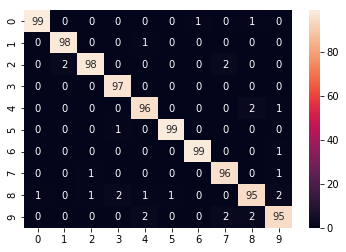

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


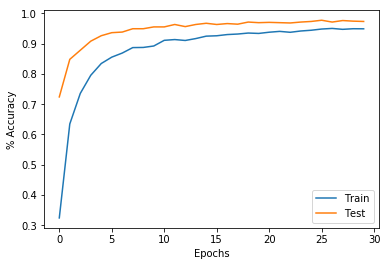

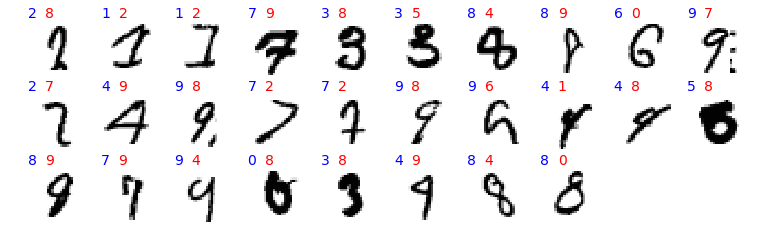

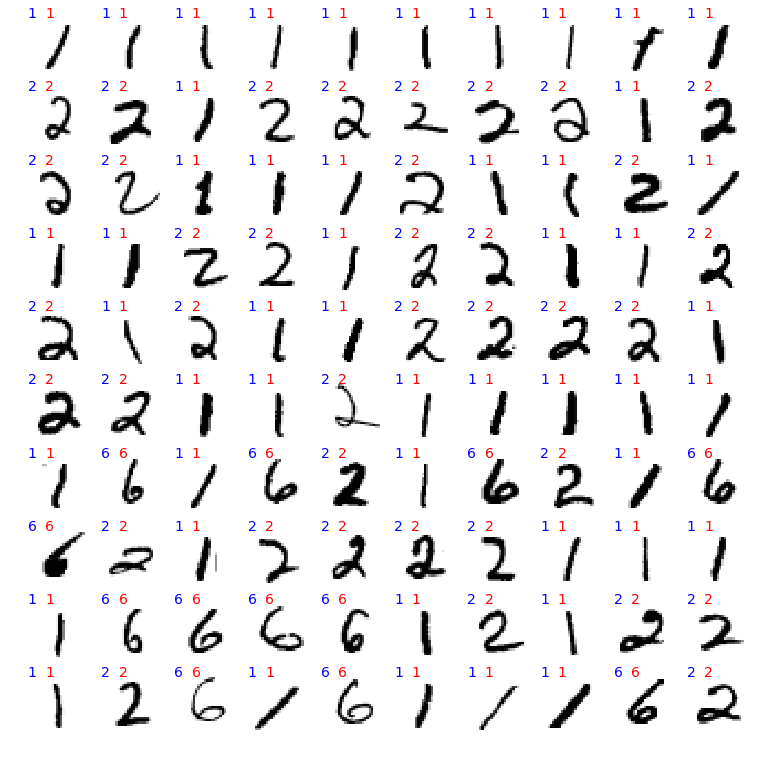

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_3 (ZeroPaddin (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 8)         208       
_________________________________________________________________
dropout_3 (Dropout)          (None, 28, 28, 8)         0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 8)         1608      
_________________________________________________________________
dropout_5 (Dropout)          (None, 10, 10, 8)         0         
__________

In [10]:
# -*- coding: utf-8 -*-
"""
HW4 CNN
"""

# Import Packages
import pandas as pd
import numpy as np
np.random.seed(1337) 
import matplotlib.pyplot as plt

from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop

import seaborn as sn
from keras.utils import vis_utils 


# Read Data
train = pd.read_csv("C://Users//User//Desktop//SYSC 575//HW4//small_train.csv",header = None).values
test  = pd.read_csv("C://Users//User//Desktop//SYSC 575//HW4//small_test.csv",header = None).values


# Baseline Model
img_rows, img_cols = 28, 28

batch_size = 100 
nb_classes = 10 
nb_epoch = 30


# Check Keras backend
if(K.image_dim_ordering()=="th"): # for Theano
    X_train = train[:, 1:].reshape(train.shape[0], 1, img_rows, img_cols)
    X_test = test[:, 1:].reshape(test.shape[0], 1, img_rows, img_cols)
    in_shape = (1, img_rows, img_cols)
else:  # for TensorFlow
    X_train = train[:, 1:].reshape(train.shape[0], img_rows, img_cols, 1)
    X_test = test[:, 1:].reshape(test.shape[0], img_rows, img_cols, 1)
    in_shape = (img_rows, img_cols, 1)

# First data is label (already removed from X_train)
y_train = train[:, 0] 
y_test = test[:,0]
# Make the value floats in [0;1] instead of int in [0;255]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


# convert class vectors to binary class matrices (ie one-hot vectors)
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# Display the shapes to check if everything's ok
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)

model = Sequential()

# Add padding to take 28x28 to 32x32
model.add(ZeroPadding2D((2,2),input_shape=in_shape))

# Roughly equivalent to C1
model.add(Convolution2D(8, (5, 5), activation = 'relu',  kernel_initializer='he_normal'))
model.add(Dropout(0.25))
# Roughly equivalent to S2
model.add(MaxPooling2D(pool_size=(2, 2), strides =(2,2)))
#model.add(Convolution2D(6, (2, 2), strides = (2,2),  activation = 'sigmoid', kernel_initializer='he_normal'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Roughly equivalent to C3
model.add(Convolution2D(8, (5, 5), activation = 'relu', kernel_initializer='he_normal'))
model.add(Dropout(0.25))

# Roughly equivalent to S4
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.25))

# Roughly equivalent to F6
model.add(Dense(80, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dropout(0.25))

# Output Layer
model.add(Dense(nb_classes, activation = 'softmax', kernel_initializer='he_normal')) #Last layer with one output per class

# Use RMSprop for training weights
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=["accuracy"])

# Alternative training approach using stochastic gradient descent (very very slow)
# sgd = SGD(lr=0.4,momentum=0.1)
# model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=["accuracy"])

# Let's Learn!!
fit = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_split=.2)

# Use the test data to see how we do
yPred = model.predict_classes(X_test)
y_Pred = model.predict_proba(X_test) 

# Confusion Matrix
targets = test[:,0]

cm = np.array([[0] * 10] * 10)
for i in range(len(targets)):
 cm[yPred[i],targets[i]] += 1
print(np.sum(np.diag(cm))/1000)

# Confusion Matrix HeatMap
df = pd.DataFrame([yPred, targets])
sn.heatmap(cm, annot = True)
plt.show()

# Accuracy Plots
print(fit.history.keys())  
plt.plot(fit.history['acc'])
plt.plot(fit.history['val_acc'])
plt.legend(['Train','Test'])
plt.xlabel('Epochs')
plt.ylabel('% Accuracy')
plt.title('Best Performance Model')
plt.show()

#  Lets look at the ones we got WRONG in thte test set

test_wrong = [im for im in zip(X_test,yPred,test[:,0]) if im[1] != im[2]]

plt.figure(figsize=(10, 10))
for ind, val in enumerate(test_wrong[:100]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((28,28))
    plt.axis("off")
    plt.text(0, 0, val[2], fontsize=14, color='blue')
    plt.text(8, 0, val[1], fontsize=14, color='red')
    plt.imshow(im, cmap='gray')

plt.show()

#  Lets look at some of the ones we got RIGHT in thte test set

test_wrong = [im for im in zip(X_test,yPred,test[:,0]) if im[1] == im[2]]

plt.figure(figsize=(10, 10))
for ind, val in enumerate(test_wrong[:100]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((28,28))
    plt.axis("off")
    plt.text(0, 0, val[2], fontsize=14, color='blue')
    plt.text(8, 0, val[1], fontsize=14, color='red')
    plt.imshow(im, cmap='gray')

plt.show()
model.summary()

255